# Intro to Keras with breast cancer data

## import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

In [2]:
df = pd.read_csv(r"Data/WDBC.csv", header=None, names=["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean", "concave points_mean", "symmetry_mean", "fractal_dimension_mean", "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se", "concave points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst", "concave points_worst", "symmetry_worst", "fractal_dimension_worst"])
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Attribute Information :

- 1) ID number 
- 2) Diagnosis (M = malignant, B = benign)
- 3-32)

Ten real-valued features are computed for each cell nucleus :

- **a)** radius (mean of distances from center to points on the perimeter) 
- **b)** texture (standard deviation of gray-scale values) 
- **c)** perimeter 
- **d)** area 
- **e)** smoothness (local variation in radius lengths)
- **f)** compactness (perimeter² / area - 1.0) 
- **g)** concavity (severity of concave portions of the contour) 
- **h)** concave points (number of concave portions of the contour) 
- **i)** symmetry 
- **j)** fractal dimension ("coastline approximation" - 1)

In [3]:
len(df.columns)

32

## Set features and label

In [4]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [5]:
print(X.shape)

(569, 30)


## Encoding categorical data

In [6]:
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

## Splitting the dataset into train and test sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Define ANN

In [9]:
# Initialising the ANN
classifier = Sequential()

In [10]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer="uniform", activation='relu', input_dim=30))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [11]:
# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [12]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

Output_dim is 1 as we want only 1 output from the final layer. Sigmoid function is used when dealing with classfication problems with 2 types of results.

## Compiling the ANN

In [13]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Optimizer is chosen as adam for gradient descent. Binary_crossentropy is the loss function used. 

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of 0.012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

## Fitting the ANN to the Training set

Batch size defines the number of samples that will be propagated through the network.

An Epoch is a complete pass through all the training data.

In [14]:
classifier.fit(X_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 [==============================] - 1s 2ms/step - loss: 0.6926 - accuracy: 0.6374
Epoch 2/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.7055
Epoch 3/150
5/5 [==============================] - 0s 0s/step - loss: 0.6877 - accuracy: 0.7802
Epoch 4/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.8418
Epoch 5/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.8989
Epoch 6/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.9187
Epoch 7/150
5/5 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.9319
Epoch 8/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6364 - accuracy: 0.9385
Epoch 9/150
5/5 [==============================] - 0s 2ms/step - loss: 0.6131 - accuracy: 0.9473
Epoch 10/150
5/5 [==============================] - 0s 4ms/step - loss: 0.5852 - accuracy: 0.9407
Epoch 11/150
5/5 [============

5/5 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9890
Epoch 85/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9890
Epoch 86/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9890
Epoch 87/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9890
Epoch 88/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9912
Epoch 89/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9890
Epoch 90/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9912
Epoch 91/150
5/5 [==============================] - 0s 0s/step - loss: 0.0483 - accuracy: 0.9912
Epoch 92/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9890
Epoch 93/150
5/5 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9912
Epoch 94/150
5/5 [================

## Predicting the test set results

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
y_pred = (y_pred > 0.5)

## Confusion Matrix

In [17]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  2],
       [ 3, 44]], dtype=int64)

<AxesSubplot:>

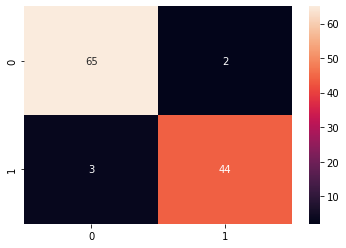

In [18]:
sns.heatmap(cm, annot=True)

## Classification Report

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Accuracy

In [20]:
print("Accuracy for this model is {}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy for this model is 95.6140350877193%


## Sources

- **Breast Cancer Wisconsin (Diagnostic) Data Set**: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
- **Intro to Keras with breast cancer data[ANN]** : https://www.kaggle.com/thebrownviking20/intro-to-keras-with-breast-cancer-data-ann/notebook
- **[ANN] Making Model for Binary Classification** : https://www.kaggle.com/mirichoi0218/ann-making-model-for-binary-classification
- **Why do we use ReLU in neural networks and how do we use it?** : https://stats.stackexchange.com/questions/226923/why-do-we-use-relu-in-neural-networks-and-how-do-we-use-it
- **Activation Functions: Sigmoid, Tanh, ReLU, Leaky ReLU, Softmax** : https://medium.com/@cmukesh8688/activation-functions-sigmoid-tanh-relu-leaky-relu-softmax-50d3778dcea5